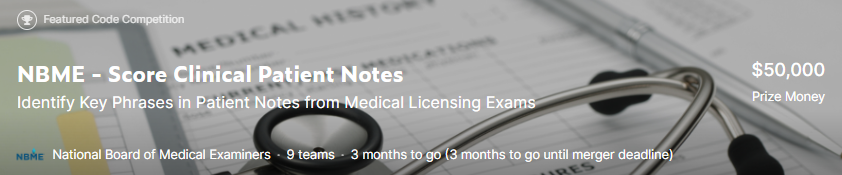

### 自然言語コンペ。事前に提供される文章から、指示されたpn_num,feature_numから、文書の位置を特定する。

### Natural Language Competition. Identify the location of a document from the indicated pn_num and feature_num from the text provided in advance.

<span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Import</span>

In [ ]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import os
import gc
from tqdm.notebook import tqdm
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')
train =True

In [ ]:
train = pd.read_csv('../input/nbme-score-clinical-patient-notes/train.csv')
train

<pre>
id-各患者ノート/機能ペアの一意の識別子。 pn_numとfeature_numを_でつなげたもの。	
pn_num-この行に注釈が付けられた患者メモ。
feature_num-この行に注釈が付けられている機能。
case_num-この患者メモが属するケース。
annotation-機能を示す患者メモ内のテキスト。機能は、1つの音符内に複数回示される場合があります。
location-ノート内の各注釈の位置を示す文字スパン。注釈を表すために複数のスパンが必要になる場合があります。その場合、スパンはセミコロンで区切られ;ます。

id - Unique identifier for each patient note / feature pair.　　　pn_num and feature_num are connected by _.
pn_num - The patient note annotated in this row.
feature_num - The feature annotated in this row.
case_num - The case to which this patient note belongs.
annotation - The text(s) within a patient note indicating a feature. A feature may be indicated multiple times within a single note.
location - Character spans indicating the location of each annotation within the note. Multiple spans may be needed to represent an annotation, in which case the spans are delimited by a semicolon ;.

In [ ]:
features = pd.read_csv('../input/nbme-score-clinical-patient-notes/features.csv')
features

<pre>
feature_num-各機能の一意の識別子。
case_num-各ケースの一意の識別子。
feature_text-機能の説明。

feature_num - A unique identifier for each feature.
case_num - A unique identifier for each case.
feature_text - A description of the feature.

In [ ]:
patient_notes = pd.read_csv('../input/nbme-score-clinical-patient-notes/patient_notes.csv')
patient_notes

<pre>
pn_num-各患者メモの一意の識別子。
case_num-患者のメモが表す臨床症例の一意の識別子。
pn_history-受験者が記録したエンカウンターのテキスト。

pn_num - A unique identifier for each patient note.
case_num - A unique identifier for the clinical case a patient note represents.
pn_history - The text of the encounter as recorded by the test taker.

### trainの0行目にあたるところを読んでいきましょう。

### Let's read what is line 0 of train.

In [ ]:
train.loc[0]

### pn_num=16を抽出

### Extract pn_num=16

In [ ]:
patient_notes.loc[16,'pn_num']

In [ ]:
data = patient_notes.loc[16,'pn_history']
data

### locationで指定しているところを抽出すると、annotaitonの中身と一致している。やり方はあっているようです。

### When I extract the location specified by location, it matches the contents of annotaiton. It seems to be the right way to do it.

In [ ]:
data[696:724]

In [ ]:
test = pd.read_csv('../input/nbme-score-clinical-patient-notes/test.csv')
test

In [ ]:
sub = pd.read_csv('../input/nbme-score-clinical-patient-notes/sample_submission.csv')
sub